In [ ]:
from google.colab import files

# Upload the kaggle.json file
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"raazpatel","key":"7cc366368a0f4bee3fd2284204b6d01c"}'}

In [ ]:
import os
import zipfile

os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!pip install kaggle

!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:08<00:00, 109MB/s] 
100% 1.06G/1.06G [00:08<00:00, 129MB/s]


In [ ]:
!unzip dogs-vs-cats.zip -d dataset/


Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/dogs/dog.4419.jpg  
  inflating: dataset/train/dogs/dog.442.jpg  
  inflating: dataset/train/dogs/dog.4420.jpg  
  inflating: dataset/train/dogs/dog.4421.jpg  
  inflating: dataset/train/dogs/dog.4422.jpg  
  inflating: dataset/train/dogs/dog.4424.jpg  
  inflating: dataset/train/dogs/dog.4425.jpg  
  inflating: dataset/train/dogs/dog.4426.jpg  
  inflating: dataset/train/dogs/dog.4427.jpg  
  inflating: dataset/train/dogs/dog.4431.jpg  
  inflating: dataset/train/dogs/dog.4433.jpg  
  inflating: dataset/train/dogs/dog.4436.jpg  
  inflating: dataset/train/dogs/dog.4438.jpg  
  inflating: dataset/train/dogs/dog.4439.jpg  
  inflating: dataset/train/dogs/dog.444.jpg  
  inflating: dataset/train/dogs/dog.4440.jpg  
  inflating: dataset/train/dogs/dog.4441.jpg  
  inflating: dataset/train/dogs/dog.4442.jpg  
  inflating: dataset/train/dogs/dog.4443.jpg  
  inflating: dataset/train/dogs/dog.4444.jpg  
  inflating

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 5000 files belonging to 2 classes.


In [ ]:
#Normalization


def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [1]:
#creat CNN



model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

NameError: name 'Sequential' is not defined

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.5574 - loss: 2.8753 - val_accuracy: 0.6056 - val_loss: 0.7047
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.6533 - loss: 0.6252 - val_accuracy: 0.7222 - val_loss: 0.5639
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7397 - loss: 0.5205 - val_accuracy: 0.7218 - val_loss: 0.5367
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.7863 - loss: 0.4509 - val_accuracy: 0.7626 - val_loss: 0.4747
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.8230 - loss: 0.3899 - val_accuracy: 0.8086 - val_loss: 0.4223
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.8611 - loss: 0.3214 - val_accuracy: 0.7618 - val_loss: 0.5588
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.8909 - loss: 0.2571 - val_accuracy: 0.5984 - val_loss: 1.1214
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.9249 - loss: 0.1857 - 

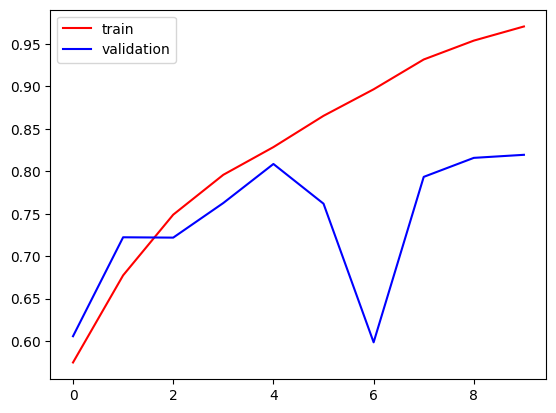

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

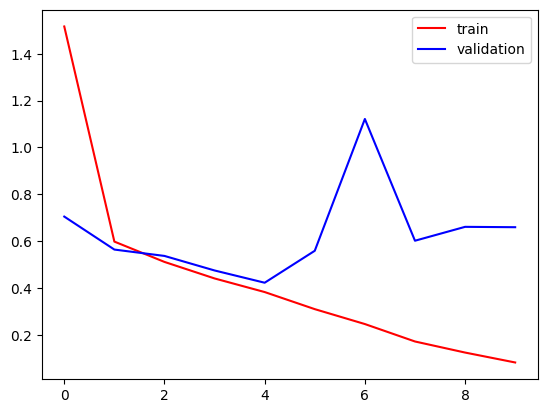

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

#Cat

In [ ]:
import cv2
target_img = cv2.imread('/content/selective-closeup-cute-kitten-floor_1.webp')

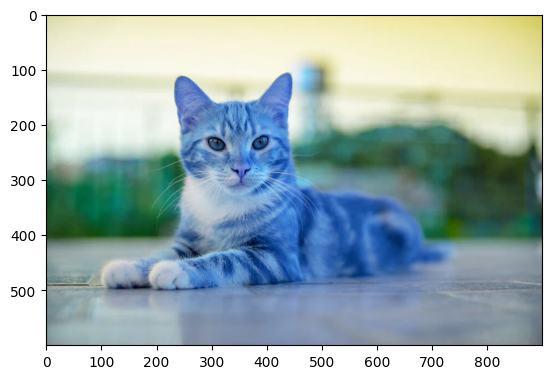

In [ ]:
plt.imshow(target_img)

In [ ]:
test_img = cv2.resize(target_img, (256,256)) #convert to 256,256

In [ ]:
test_input = test_img.reshape((1,256,256,3)) #batchs

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step


array([[0.]], dtype=float32)

#Dog

In [ ]:
target_img_dog = cv2.imread('/content/funny-portrait-of-cute-corgi-dog-outdoors-free-photo.jpg')

In [ ]:
test_img_dog = cv2.resize(target_img_dog, (256,256)) #convert to 256,256

In [ ]:
test_input_dog = test_img_dog.reshape((1,256,256,3)) #batchs

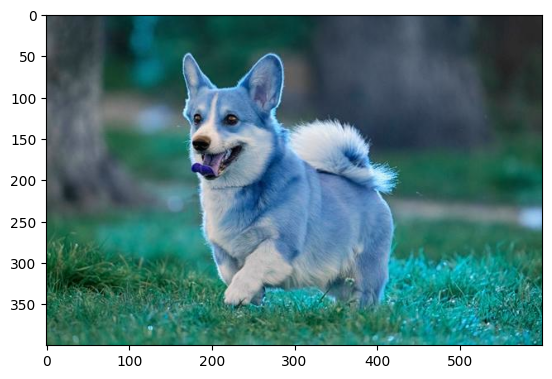

In [ ]:
plt.imshow(target_img_dog)

In [ ]:
model.predict(test_input_dog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.]], dtype=float32)

#here 0:Dog and 1:cat

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator= train_datagen.flow_from_directory('/content/dogs_vs_cats/train',target_size=(256,256),batch_size=32,class_mode='binary')

Found 20000 images belonging to 2 classes.


In [ ]:
test_generator= test_datagen.flow_from_directory('/content/dogs_vs_cats/test',target_size=(256,256),batch_size=32,class_mode='binary')

Found 5000 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_generator,epochs=10,validation_data=test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 314s 494ms/step - accuracy: 0.5492 - loss: 3.9852 - val_accuracy: 0.5114 - val_loss: 1.4256
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 309s 494ms/step - accuracy: 0.5906 - loss: 0.6832 - val_accuracy: 0.7302 - val_loss: 0.5749
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 305s 488ms/step - accuracy: 0.7223 - loss: 0.5547 - val_accuracy: 0.6608 - val_loss: 0.5334
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 305s 487ms/step - accuracy: 0.7749 - loss: 0.4760 - val_accuracy: 0.7996 - val_loss: 0.4345
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 489ms/step - accuracy: 0.7983 - loss: 0.4355 - val_accuracy: 0.8162 - val_loss: 0.4372
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 307s 491ms/step - accuracy: 0.8246 - loss: 0.3885 - val_accuracy: 0.8198 - val_loss: 0.4033
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 320s 489ms/step - accuracy: 0.8361 - loss: 0.3698 - val_accuracy: 0.7234 - val_loss: 0.5399
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 302s 483ms/step - accuracy: 0.8588 -